# Exploratory Data Analysis on Data Analyst Job Market Data

## Overview
---

![header](img/campaign-creators-unsplash.jpg)
*Campaign Creators - Unsplash*

Data is being generated everyday and the amount of data generated just getting bigger each time. That data is valuable only if we can explain what the data means. That is the role of people in the data science industry. Data science is considered as one of the fastest growing jobs according to the [LinkedIn](https://business.linkedin.com/talent-solutions/resources/talent-acquisition/jobs-on-the-rise-us)'s 2020 U.S. Emerging Job Report. 

In this notebook, we will exploring a data data science job market in the U.S., especially for data analyst role. We will also try to answer several questions including:

1. What are the skills required to be a data analyst?
2. What is the average salary of a data analyst?
3. Which industry are looking for data analysts the most?

We will also try to generate more questions while finding interesting informations throughout the analysis.

## <a name='data'></a> Data

---

We are going to use a [dataset](https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs) created by [picklesueat](https://github.com/picklesueat/data_jobs_data) that is hosted on Kaggle by [Larxel](https://www.kaggle.com/andrewmvd). The data set contains more than **2000 job listing for data analyst position in U.S**. 

## <a name='data_prep'></a> Data Preparation
---

### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_theme(palette='colorblind')
palette = sns.color_palette('colorblind')

### Loading the data

Let's import the data into a pandas DataFrame object.

In [2]:
df = pd.read_csv('data/DataAnalyst.csv')

### Viewing the dataframe

Our data has 2253 records and 16 columns total.

In [3]:
print(f'Number of records: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of records: 2253
Number of columns: 16


Let's look at how our data is structured by looking at the first 5 and the last 5 of its records.

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
df.tail()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1
2252,2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1


Checking the data type of each columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

### Data cleaning and transformation

#### Dropping unnecessary columns

We will drop some columns that are not going to be used in this analysis.

In [7]:
list(df.columns)

['Unnamed: 0',
 'Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Easy Apply']

Dropping the columns.

In [8]:
df.drop(['Unnamed: 0', 'Easy Apply', 'Competitors', 
         'Type of ownership', 'Headquarters', 
         'Revenue'], axis=1, inplace=True)

The list of the columns after some are dropped.

In [9]:
list(df.columns)

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Size',
 'Founded',
 'Industry',
 'Sector']

#### Handling missing values

Let's check how many missing values in each columns in our dataframe.

In [10]:
def missing_values(df):
    
    '''Return the number of missing values on each 
    DataFrame object columns and their percentage'''
    
    missing_values_df = df.isnull().sum().to_frame(name='missing_values')
    missing_values_df['pct'] = round(
        (missing_values_df['missing_values'] / len(df)) * 100, 2)
    
    return missing_values_df

missing_values(df)

,missing_values,pct
Job Title,0,0.00
Salary Estimate,0,0.00
Job Description,0,0.00
Rating,0,0.00
Company Name,1,0.04
Location,0,0.00
Size,0,0.00
Founded,0,0.00
Industry,0,0.00
Sector,0,0.00


There are values in the data that is either -1, or -1.0 in either string or number format. These values could indicate the missing values in our data.

In [11]:
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,-1,Staffing & Outsourcing,Business Services
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO",10000+ employees,1935,Wholesale,Business Services
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO",201 to 500 employees,1984,Enterprise Software & Network Solutions,Information Technology
2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO",10000+ employees,1864,Health Care Services & Hospitals,Health Care


We will change those values to NULL to indicate them as missing values.

In [12]:
# Changing the '-1.0', '-1', -1 values to NULLs
df.replace(['-1.0', '-1', -1], np.nan, inplace=True)
missing_values(df)

,missing_values,pct
Job Title,0,0.00
Salary Estimate,1,0.04
Job Description,0,0.00
Rating,272,12.07
Company Name,1,0.04
Location,0,0.00
Size,163,7.23
Founded,660,29.29
Industry,353,15.67
Sector,353,15.67


Checking the missing values for the `Salary Estimate` column.

In [13]:
df.loc[df['Salary Estimate'].isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA",51 to 200 employees,2001.0,Staffing & Outsourcing,Business Services


Find out the salary mostly used by the Protingent company.

In [14]:
df.loc[df['Company Name'].fillna('').str.contains('Protingent')][['Company Name', 'Salary Estimate']]

,Company Name,Salary Estimate
2123,Protingent\n4.4,$55K-$101K (Glassdoor est.)
2146,Protingent Staffing\n4.4,$55K-$101K (Glassdoor est.)
2149,Protingent\n4.4,NaN


Use the same salary estimate to fill the missing value.

In [15]:
protingent_salary = df.loc[df['Company Name'].fillna(''). \
                           str.contains('Protingent'), 'Salary Estimate'].to_list()[0]

df['Salary Estimate'].fillna(protingent_salary, inplace=True)

In [16]:
missing_values(df)

,missing_values,pct
Job Title,0,0.00
Salary Estimate,0,0.00
Job Description,0,0.00
Rating,272,12.07
Company Name,1,0.04
Location,0,0.00
Size,163,7.23
Founded,660,29.29
Industry,353,15.67
Sector,353,15.67


Checking the missing values in the `Size` column

In [17]:
# Every unique values in the Size column
df['Size'].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown', nan], dtype=object)

We will change the missing values in the `Size` column with `Unknown`.

In [18]:
df['Size'] = df['Size'].fillna('Unknown')
missing_values(df)

,missing_values,pct
Job Title,0,0.00
Salary Estimate,0,0.00
Job Description,0,0.00
Rating,272,12.07
Company Name,1,0.04
Location,0,0.00
Size,0,0.00
Founded,660,29.29
Industry,353,15.67
Sector,353,15.67


Checking the missing values in the `Company Name` column

In [19]:
df.loc[df['Company Name'].isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",NaN,NaN,"Mooresville, NC",Unknown,NaN,NaN,NaN


The missing values could indicate that the company hide their company information on the job post.

For the rest of the columns, removing the Nulls will affect the analysis result because the high number of missing values in them. 

#### Fixing `Company Name` column

The values in the `Company Name` column are written with the company name followed by their rating. We already have the column for the rating of each company.

In [20]:
df[['Company Name', 'Rating']].head()

,Company Name,Rating
0,Vera Institute of Justice\n3.2,3.2
1,Visiting Nurse Service of New York\n3.8,3.8
2,Squarespace\n3.4,3.4
3,Celerity\n4.1,4.1
4,FanDuel\n3.9,3.9


In [21]:
# Fix Company Name column
df['Company Name'] = df['Company Name'].apply(
    lambda x: str(x).split('\n')[0]
)

df[['Company Name', 'Rating']].head()

,Company Name,Rating
0,Vera Institute of Justice,3.2
1,Visiting Nurse Service of New York,3.8
2,Squarespace,3.4
3,Celerity,4.1
4,FanDuel,3.9


### Adding minimum and maximum salary range columns

The `Salary Estimate` column written in range of possible salary for each job post. We will perform transformation on this column to take the low end range, the high end range, and the average from those range.

In [22]:
df['Salary Estimate'].head()

0    $37K-$66K (Glassdoor est.)
1    $37K-$66K (Glassdoor est.)
2    $37K-$66K (Glassdoor est.)
3    $37K-$66K (Glassdoor est.)
4    $37K-$66K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [23]:
# Clean the Salary Estimate column
salary_estimate_series = df['Salary Estimate']. \
    str.replace(' (Glassdoor est.)', '', regex=False). \
    str.replace('\\$|K', '', regex=True). \
    apply(lambda x: x.split('-'))

# Take the low end range value from the Series
df['Salary Low'] = salary_estimate_series.apply(
    lambda x: x[0]).astype(float)

# Take the high end range value from the Series
df['Salary High'] = salary_estimate_series.apply(
    lambda x: x[1]).astype(float)

# Average between the ranges
df['Salary Average'] = (df['Salary Low'] + df['Salary High']) / 2

df[['Salary Low', 'Salary High', 'Salary Average']].head()

,Salary Low,Salary High,Salary Average
0,37.0,66.0,51.5
1,37.0,66.0,51.5
2,37.0,66.0,51.5
3,37.0,66.0,51.5
4,37.0,66.0,51.5


### Adding skills columns

Adding skills related columns to understand what the skills are needed to be a data analyst.

In [24]:
def add_skills_cols(df):
    
    '''Adding skills columns to the dataframe'''
    
    skills_list = ['SQL', 'Excel', 'Tableau', 
              r'\br\b', 'Power BI', 'SAS', 
              'Word', 'PowerPoint', 'AWS', 
              'JavaScript', 'Python']
    
    job_desc_series = df['Job Description'].str.lower().str.replace('\n', ' ').str.replace('  ', ' ')
    
    for skill in skills_list:
        if skill == r'\br\b':
            df['R'] = np.where(job_desc_series.str.contains(skill.lower()), 1, 0)
        else:
            df[skill] = np.where(job_desc_series.str.contains(skill.lower()), 1, 0)

add_skills_cols(df)

# Looking at the result
df.loc[:,'Excel':'Python'].head()

,Excel,Tableau,R,Power BI,SAS,Word,PowerPoint,AWS,JavaScript,Python
0,0,0,1,0,0,0,0,1,0,1
1,1,0,1,0,1,1,1,0,0,0
2,1,1,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1


### Adding state name column

We will extract the state name from the `Location` column to perform analysis on state level.

In [25]:
# Every unique state code from the Location column
state_abb = df['Location'].apply(lambda x: x.split(', ')[-1]).unique().tolist()

# The state name from every state code available in the Location column
state_name = ['New York', 'New Jersey', 'Utah', 
              'California', 'Virginia', 'Florida', 
              'Illinois', 'Texas', 'Arizona', 
              'Pennsylvania', 'Delaware', 'Ohio', 
              'North Carolina', 'South Carolina', 'Indiana', 
              'Washington', 'Georgia', 'Kansas', 
              'Colorado']

# Dictionary to map each state code with their state name
state_dict = dict(zip(state_abb, state_name))

# Extracting state code from the Location column
df['State'] = df['Location'].str.replace(' ', '') \
                .apply(lambda x: x.split(',')[-1])

df['State'] = df['State'].replace(state_dict)

df[['Location', 'State']].head()

,Location,State
0,"New York, NY",New York
1,"New York, NY",New York
2,"New York, NY",New York
3,"New York, NY",New York
4,"New York, NY",New York


### Fixing the company size column

The values in the company size column, `size`, are written as **501 - 1000 employees**. We will clean this column to only show the number of employes in each company.

In [26]:
df[['Size']].head()

,Size
0,201 to 500 employees
1,10000+ employees
2,1001 to 5000 employees
3,201 to 500 employees
4,501 to 1000 employees


In [27]:
# Removing 'employees' text from the Size column
df['Size'] = df.loc[~df['Size'].isna(), 'Size'].str.replace(' employees', '')

df[['Size']].head()

,Size
0,201 to 500
1,10000+
2,1001 to 5000
3,201 to 500
4,501 to 1000


### Adding job role column

The data was created by finding every jobs that contains word `analyst` in them.

In [28]:
print(f'Total Rows: {len(df)}')

contains_analyst = df["Job Title"].str.contains("analyst", case=False, regex=False).sum()

print(f'Rows with word "analyst" in the `Job Title` column: {contains_analyst}')

Total Rows: 2253
Rows with word "analyst" in the `Job Title` column: 2253


Let's create a new column to determine the job roles of each job title. We'll create 5 categories, **Data Analyst**, **Data Scientist**, **Data Engineer**, **Data Analytics Manager**, **Business Analyst**.

In [29]:
job_role = ['Data Scientist', 
            'Data Engineer', 
            'Data Analytics Manager', 
            'Business Analyst']

job_title_series = df['Job Title'].str.lower()

job_title = [
    job_title_series.str.contains('scientist|science|ml|machine learning'),
    job_title_series.str.contains('etl|warehouse|database'),
    job_title_series.str.contains('manager|vp'),
    job_title_series.str.contains('business|ba')
]

df['Job Role'] = np.select(job_title, job_role, 'Data Analyst')

df[['Job Role']].head(10)

,Job Role
0,Data Analyst
1,Data Analyst
2,Data Analyst
3,Data Analyst
4,Data Analyst
5,Data Analyst
6,Business Analyst
7,Data Scientist
8,Data Analyst
9,Data Analyst


## <a name='analysis'></a> Analysis
---

### Univariate analysis

#### Salary distribution

The salary for data analyst jobs are concentrated at around **\\$60,000** to **\\$80,000** per year according to our data.

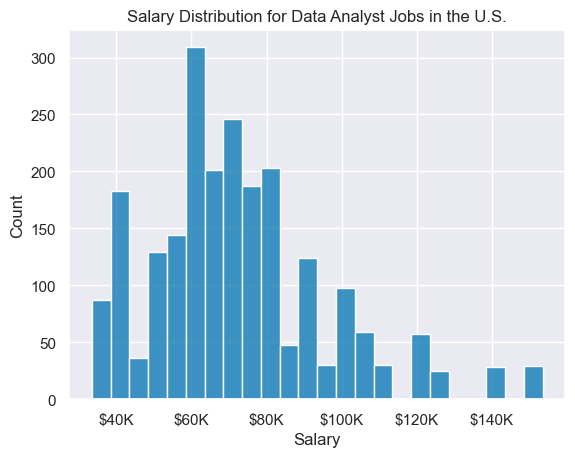

In [30]:
fig, ax = plt.subplots()

ax = sns.histplot(data=df, x='Salary Average', binwidth=5)

ax.set(title='Salary Distribution for Data Analyst Jobs in the U.S.', 
       xlabel='Salary')
ax.set_xticks(range(40, 160, 20), ['$' + str(num) + 'K' for num in list(range(40, 160, 20))])

plt.show()

#### Rating distribution

Most of the company are rated by their employees/former employees at around 3 - 4 points. According to [Glassdoor](https://help.glassdoor.com/s/article/Ratings-on-Glassdoor?language=en_US), this range means that employees from those company are feeling "Ok" and "Satisfied" working there.

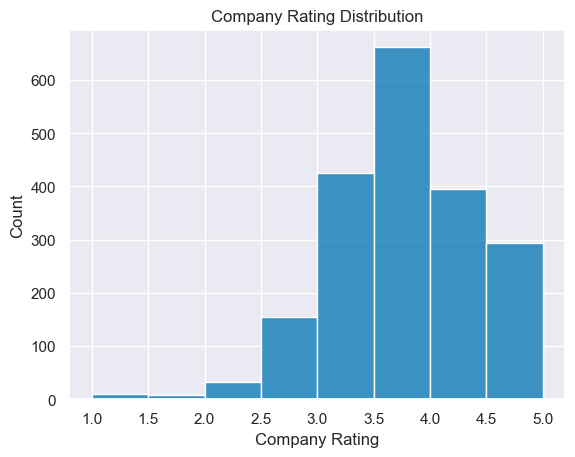

In [31]:
fig, ax = plt.subplots()

ax = sns.histplot(data=df, x='Rating', binwidth=0.5)

ax.set(title='Company Rating Distribution', 
       xlabel='Company Rating')

plt.show()

#### Number of job posts per job role

More than 80% of the total records in our data arefor Data Analyst role.

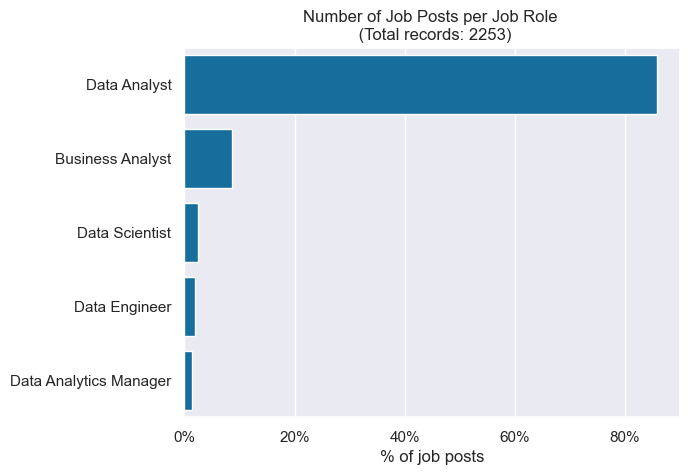

In [32]:
job_role_counts = df['Job Role'].value_counts(normalize=True).to_frame(name='pct')

fig, ax = plt.subplots()

ax = sns.barplot(data=job_role_counts, x='pct', y=job_role_counts.index, color=palette[0])

ax.set(title=f'Number of Job Posts per Job Role \n (Total records: {len(df)})', 
       xlabel='% of job posts', 
       ylabel='')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.show()

#### Number of job post for each sector

**IT** and **business services** are sectors with the highest demand for data analyst with more than 500 job posts.

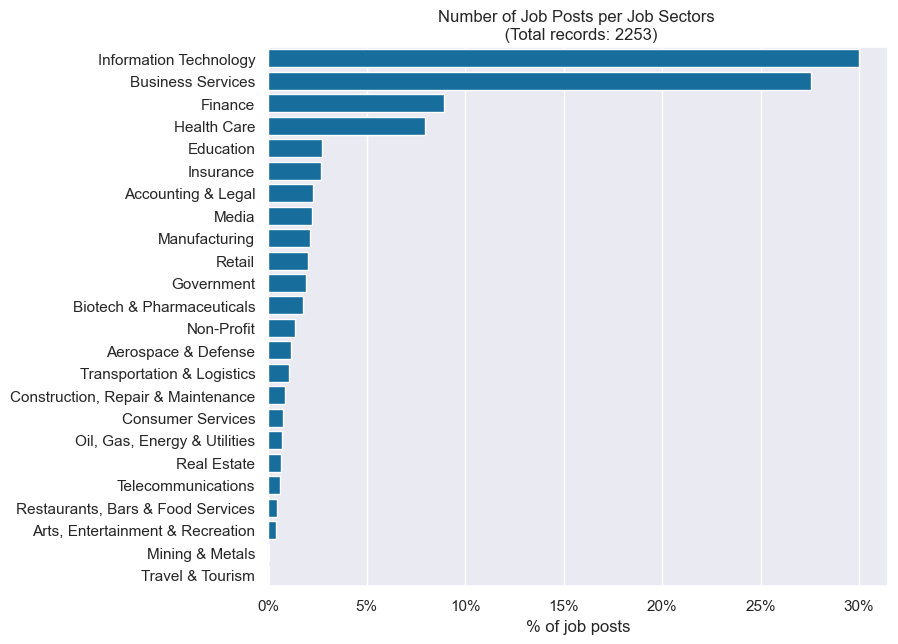

In [33]:
sector_counts = df['Sector'].value_counts(normalize=True).to_frame(name='pct')

fig, ax = plt.subplots(figsize=(8,7))

ax = sns.barplot(data=sector_counts, x='pct', y=sector_counts.index, color=palette[0])

ax.set(title=f'Number of Job Posts per Job Sectors \n (Total records: {len(df)})', 
       xlabel='% of job posts', 
       ylabel='')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.show()

#### Number of job post for each industry

On the industry level, **IT Services and Staffing & Outsourcing** are the industries with the highest demand for a data analyst.

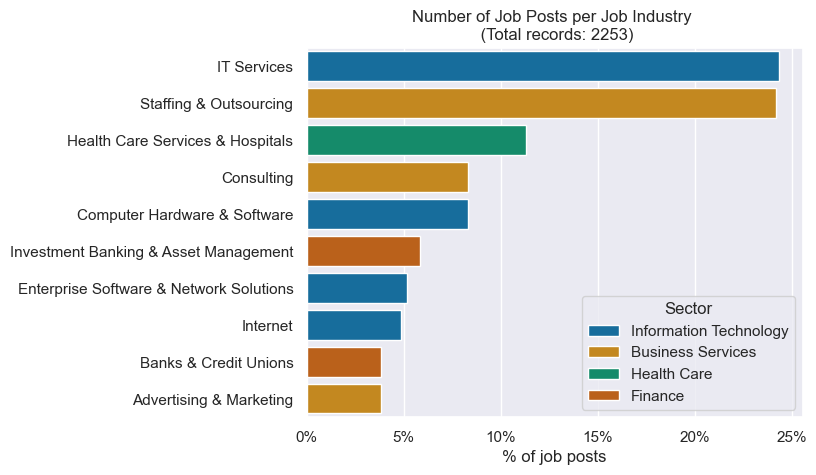

In [34]:
industry_df = df.groupby(['Sector', 'Industry'], as_index=False). \
    agg(Count=('Industry', 'count')). \
    sort_values('Count', ascending=False)[:10]

industry_df['pct'] = industry_df['Count'] / industry_df['Count'].sum()

fig, ax = plt.subplots()

ax = sns.barplot(data=industry_df, 
                 x='pct', 
                 y='Industry',
                 hue='Sector', dodge=False)
                 
ax.set(title=f'Number of Job Posts per Job Industry \n (Total records: {len(df)})', 
       xlabel='% of job posts', 
       ylabel='')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.show()

#### Job posts per company founded year

There are more jobs from companies that was founded at around 1990 to 2000.

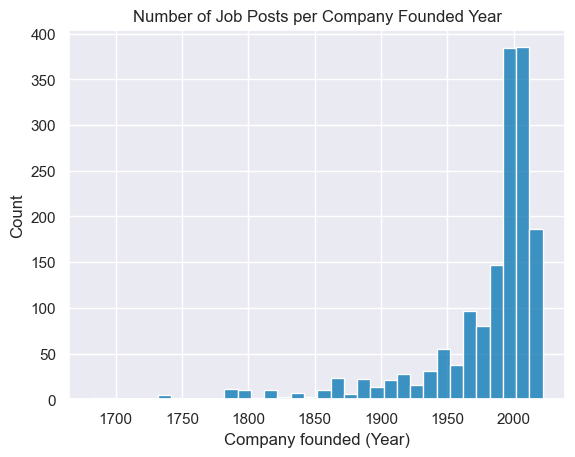

In [35]:
fig, ax = plt.subplots()

ax = sns.histplot(data=df, x='Founded', binwidth=10)

ax.set(title='Number of Job Posts per Company Founded Year', 
       xlabel='Company founded (Year)')

plt.show()

#### Job posts per state

Three states with the most job posts opening for data analyst are **California**, **Texas**, and **New York**.

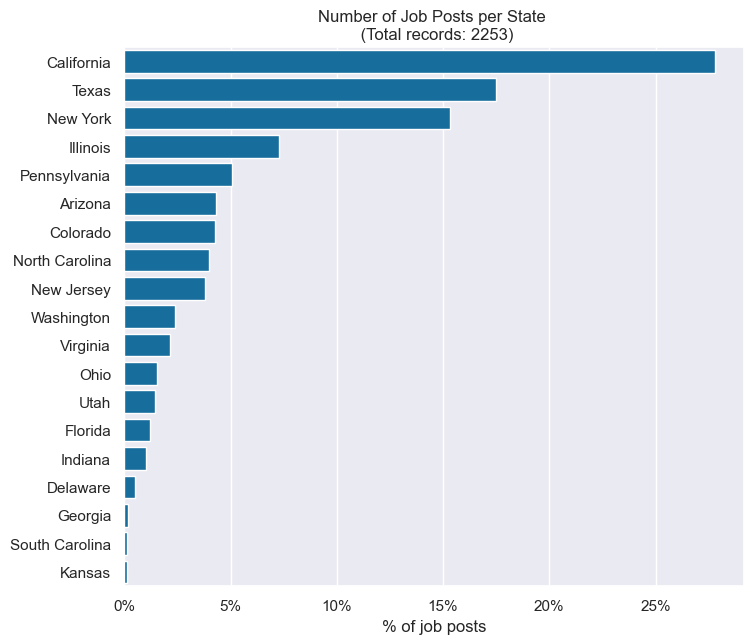

In [36]:
state_counts = df['State'].value_counts(normalize=True).to_frame(name='pct')

fig, ax = plt.subplots(figsize=(8,7))

ax = sns.barplot(data=state_counts, x='pct', y=state_counts.index, color=palette[0])

ax.set(title=f'Number of Job Posts per State \n (Total records: {len(df)})', 
       xlabel='% of job posts', 
       ylabel='')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.show()

#### Job posts per location

Cities with the most job posts for data analyst are **New York**, **Chicago**, and **San Francisco**.

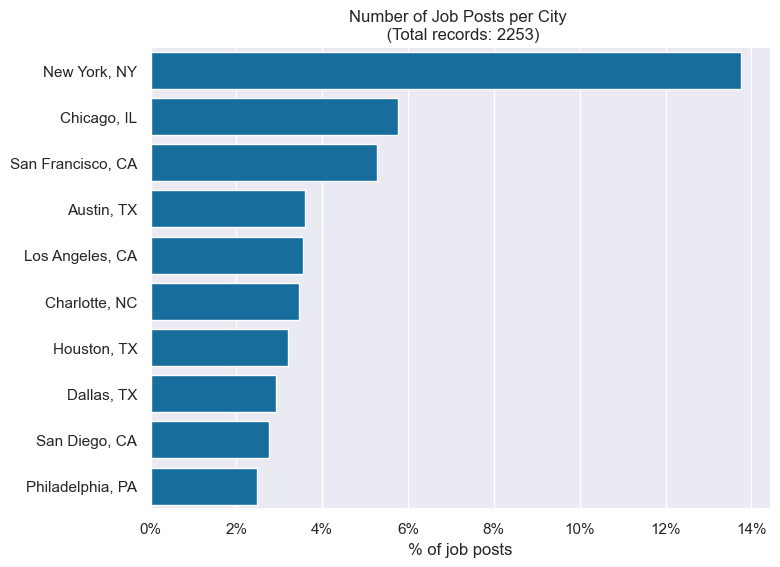

In [37]:
city_counts = df['Location'].value_counts(normalize=True)[:10].to_frame(name='pct')

fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot(data=city_counts, x='pct', y=city_counts.index, color=palette[0])

ax.set(title=f'Number of Job Posts per City \n (Total records: {len(df)})', 
       xlabel='% of job posts', 
       ylabel='')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.show()

#### The most in demand skills for data analyst

SQL and Excel are the most in demand skills for data analyst with over 60% of the job posts mention them.

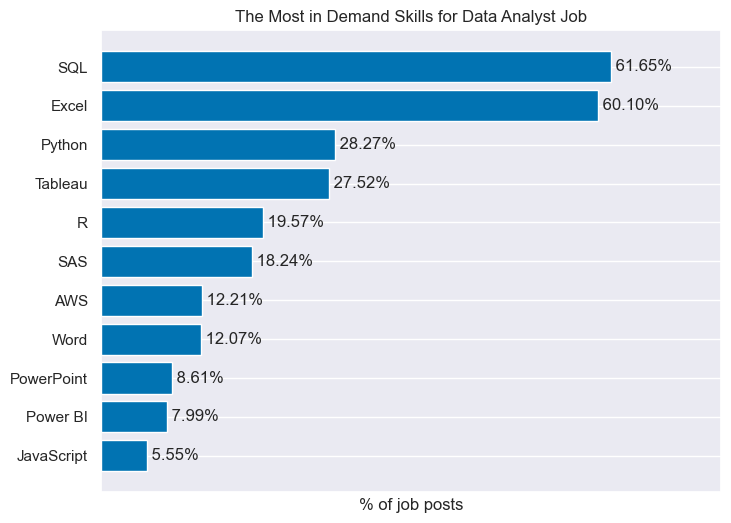

In [38]:
skill_count = df[
    ('SQL, Excel, Tableau, R, Power BI, SAS, Word, PowerPoint, AWS, JavaScript, Python').split(', ')
].sum().sort_values(ascending=True)

skill_count_pct = skill_count / len(df) * 100

fig, ax = plt.subplots(figsize=(8,6))

bars = ax.barh(skill_count_pct.index,
       skill_count_pct.values)

ax.bar_label(bars, fmt='% .2f%%')

ax.set(title='The Most in Demand Skills for Data Analyst Job', 
       xlabel='% of job posts')

ax.set_xticks([])

ax.set_xlim(right=75)

plt.show()

### Multivariate analysis

#### Salary per job role

Let's first look at the average salary for each job role from the `Job Role` column we created earlier. Using the the average of low end and high range of each salary for each job role, we can see that Data Analytics Manager or managerial positions have the highest average salary. This result could be caused by the small number of data for this role, which indicated by the large confidence interval on the result.

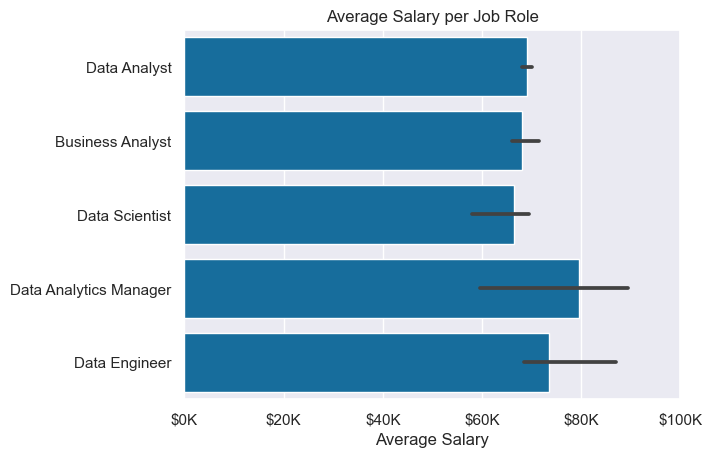

In [39]:
fig, ax = plt.subplots()

ax = sns.barplot(data=df, y='Job Role', x='Salary Average', estimator='median', color=palette[0])

ax.set(title='Average Salary per Job Role',
       xlabel='Average Salary',
       ylabel='')

ax.set_xticks(range(0,101, 20), ['$' + str(num) + 'K' for num in list(range(0,101, 20))])

plt.show()

#### Highest paying skills

Python is the highest paying skills for a data analyst. On average, the job posts that mention them offer salary at around \\$71,000.

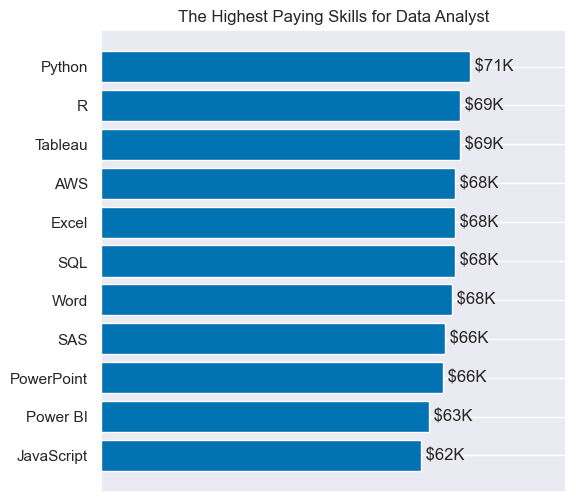

In [40]:
def skills_salary(df):
    
    '''Change the value in each skill column from 1 to the corresponding Salary Avearge on that row'''
    
    cols = ('SQL, Excel, Tableau, R, Power BI, SAS, Word, PowerPoint, AWS, JavaScript, Python').split(', ')
    
    for col in cols:
        df[col] = np.where(df[col] == 1, df['Salary Average'], np.nan)
    
    return df[cols]

# Creating new DataFrame of skills from the original DataFrame
skills_salary_df = skills_salary(df.copy())

# Generate Series of median from the salary for each skills
skills_salary_avg = skills_salary_df.apply(np.nanmedian).sort_values()

# Create the visual
fig, ax = plt.subplots(figsize=(6,6))

bars = ax.barh(skills_salary_avg.index,
       skills_salary_avg.values)

ax.bar_label(bars, fmt=' $%dK')

ax.set(title='The Highest Paying Skills for Data Analyst', xticks=[])
ax.set_xlim(right=90)

plt.show()

#### Highest paying sector

Biotech and Pharmacuticals sector is the sector that offers the highest salary with minimum salary starting from around \\$60,000 and the maximum salary at around \\$110,000 per year.

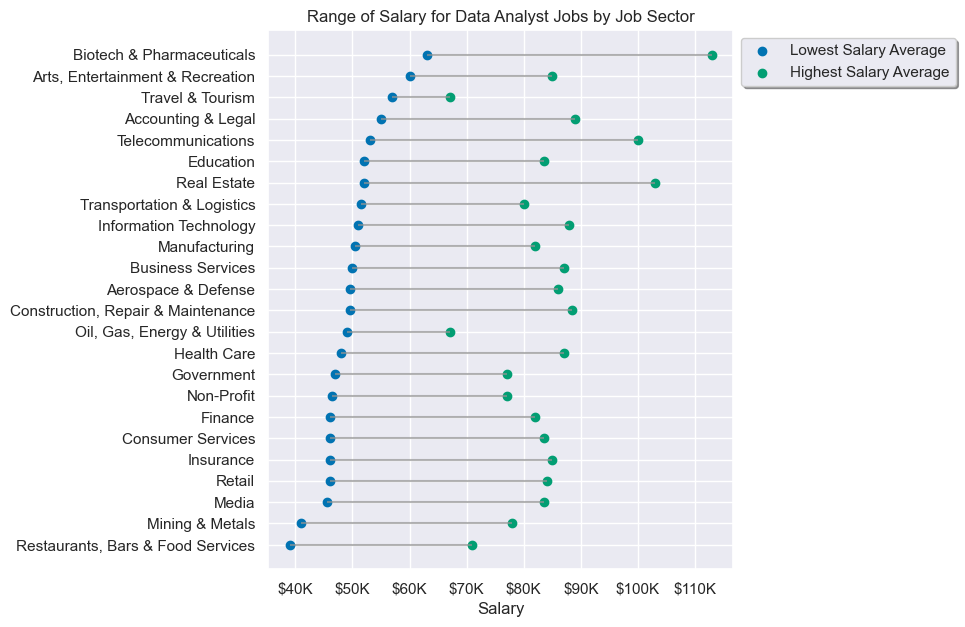

In [41]:
top_salary_sector = df.groupby('Sector').agg(
                        lowest_salary_avg = ('Salary Low', 'median'),
                        highest_salary_avg = ('Salary High', 'median'),
                    ).sort_values('lowest_salary_avg')

fig, ax = plt.subplots(figsize=(6,7))

my_range = range(len(top_salary_sector.index))

ax.scatter(top_salary_sector['lowest_salary_avg'], my_range, 
           color=palette[0], 
           label='Lowest Salary Average')

ax.scatter(top_salary_sector['highest_salary_avg'], my_range, 
           color=palette[2],
           label='Highest Salary Average')

ax.hlines(y=my_range, xmin='lowest_salary_avg', xmax='highest_salary_avg', 
          data=top_salary_sector, color=palette[7], alpha=0.7)

ax.set(title='Range of Salary for Data Analyst Jobs by Job Sector',
       xlabel='Salary')

ax.set_xticks(range(40, 111, 10), ['$' + str(num) + 'K' for num in list(range(40, 111, 10))])
ax.set_yticks(my_range, top_salary_sector.index)
ax.legend(bbox_to_anchor=(1, 1), fancybox=True, shadow=True)

plt.show()

#### Company rating vs. salary

Most of the job posts are coming from companies with rating from 3 to 5. Some job posts from high rated companies are offering quite high salary for data analyst position.

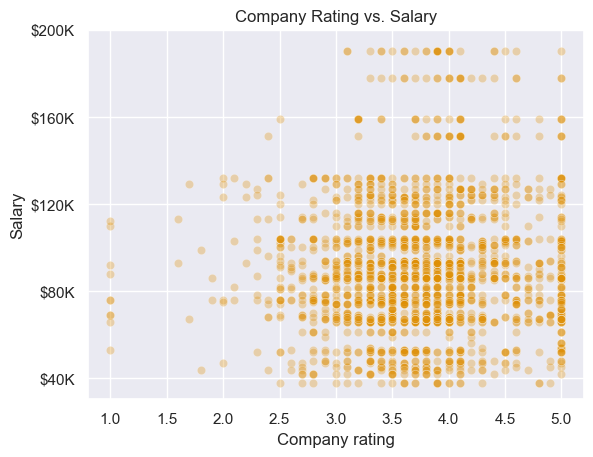

In [42]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='Rating', y='Salary High', ax=ax, alpha=0.3, color=palette[1])

ax.set(title='Company Rating vs. Salary',
       xlabel='Company rating', 
       ylabel='Salary')

ax.set_yticks(range(40,201, 40), ['$' + str(num) + 'K' for num in list(range(40,201, 40))])

plt.show()

#### Company size vs. salary

The size of the company doesn't mean much in term of the salary for a data analyst job.

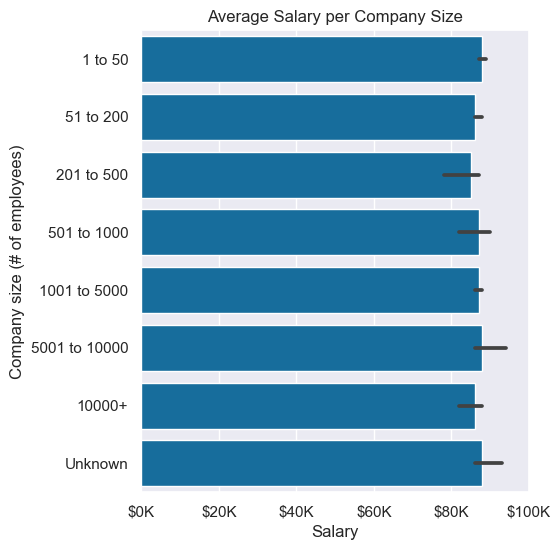

In [43]:
size_salary = df.groupby('Size')['Salary High'].median() * 1000

order = ['1 to 50', '51 to 200', '201 to 500', 
         '501 to 1000', '1001 to 5000', '5001 to 10000', 
         '10000+', 'Unknown']

fig, ax = plt.subplots(figsize=(5,6))

sns.barplot(data=df, y='Size', x='Salary High', estimator='median', order=order, color=palette[0], ax=ax)

ax.set(title='Average Salary per Company Size',
       xlabel='Salary', 
       ylabel='Company size (# of employees)')

ax.set_xticks(range(0,101, 20), ['$' + str(num) + 'K' for num in list(range(0,101, 20))])

plt.show()

## <a name='conclusion'></a> Conclusion

---

* Average salary for a data analyst in the U.S. is around **\\$60,000 - \\$80,000 per year**.
* **SQL and MS. Excel are two of the most in demand skills** for a data analyst to have with over 60% of job posts mention them.
* **Python is the highest paying skill for a data analyst**, with salary at around \\$71,000 per year by being knowledgable with it.
* **IT and Business Services are the sectors with the most demand for a data analyst** with **IT Services and Staffing & Outsourcing the industries within those sectors with the most job posts** in our data.
* **California**, **Texas**, and **New York** are states with the most job posts came from. 